In [1]:
# Imports
import datetime
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import scipy

%matplotlib inline
plt.style.use('bmh')

In [2]:
#below all subdirectories are searched for data files

all_files = []
file_end = 'segments.csv'
def read(root):
    for (dir_path, dir_names, files) in os.walk(root):
        for file in files:
             if file.lower().endswith(file_end.lower()):
                paths= re.split(r"[/\\]", dir_path.lower())
                print(paths)
                df = pd.read_csv(os.path.join(dir_path, file),
                                 )#names=["bwd_path0","bwd_path1","srtt_path0","srtt_path1","loss_path0","loss_path1"]
                #print(file)
                df['trace'] = int(file.split("_")[0])
                df['model'] = paths[-2].split("_")[-2]
                #based on subdirectory, is the download a video or a file
                #df['download_type'] = paths[2]
    #
                ##based on subdirectory, what type of mobility are the traces
                #df['trace_mobility'] = paths[3]
    #
                #df['TraceID'] = len(all_files) #each file is a separate trace
                all_files.append(df)
old_lstm = "central_service/runs/20230528_11_22_27_LSTM_test/"
new_lstm = "central_service/runs/20230529_10_15_43_LSTM_test/"
min_rtt = 'central_service/runs/20230529_11_01_43_minrtt_test/'
a2c = "central_service/runs/20230530_00_45_43_a2c_test/"
falcon = "central_service/runs/20240518_11_56_10_FALCON_test/"

runs = [old_lstm, min_rtt, a2c, falcon]
for r in runs:
    read(r)
df_runs = pd.concat(all_files, ignore_index=True)
#df_runs

['central_service', 'runs', '20230528_11_22_27_lstm_test', '']
['central_service', 'runs', '20230528_11_22_27_lstm_test', '']
['central_service', 'runs', '20230528_11_22_27_lstm_test', '']
['central_service', 'runs', '20230528_11_22_27_lstm_test', '']
['central_service', 'runs', '20230528_11_22_27_lstm_test', '']
['central_service', 'runs', '20230528_11_22_27_lstm_test', '']
['central_service', 'runs', '20230528_11_22_27_lstm_test', '']
['central_service', 'runs', '20230528_11_22_27_lstm_test', '']
['central_service', 'runs', '20230528_11_22_27_lstm_test', '']
['central_service', 'runs', '20230528_11_22_27_lstm_test', '']
['central_service', 'runs', '20230529_11_01_43_minrtt_test', '']
['central_service', 'runs', '20230529_11_01_43_minrtt_test', '']
['central_service', 'runs', '20230529_11_01_43_minrtt_test', '']
['central_service', 'runs', '20230529_11_01_43_minrtt_test', '']
['central_service', 'runs', '20230529_11_01_43_minrtt_test', '']
['central_service', 'runs', '20230529_11_01_4

In [3]:
traces = pd.read_csv("central_service/test_traces.csv")
traces['mobility'] = (traces['Trace1'] == 'wifi') | (traces['Trace2'] == 'wifi')
traces['mobility'] = traces['mobility'].apply(lambda x: 'static' if x else 'mobile')
traces = traces.rename(columns={traces.columns[0]: 'trace'}, errors="raise")
traces = traces[['trace', 'mobility']]
traces

,trace,mobility
0,0,mobile
1,1,mobile
2,2,mobile
3,3,mobile
4,4,mobile
5,5,static
6,6,mobile
7,7,mobile
8,8,mobile
9,9,static


In [4]:
df_runs = df_runs.merge(traces, on='trace')
trace_qoe = df_runs.groupby(['trace', 'model']).agg({'qoe':'last'}).reset_index().rename(columns={'qoe':'trace_qoe'}, errors="raise")
df_runs = df_runs.merge(trace_qoe, on=['trace', 'model'])
df_runs
#trace_qoe

,Unnamed: 0,segment_nr,bandwidth,bitrate,down_shifts,buffering_ratio,initial_buffering,stall_count,stall_sum,qoe,trace,model,mobility,trace_qoe
0,0,0,1502.066519,247444,0,0.000000,0.785746,0,0.000000,0.239470,0,lstm,mobile,1.411736
1,1,1,348054.404177,247444,0,0.000000,0.000000,0,0.000000,0.239470,0,lstm,mobile,1.411736
2,2,2,457241.382155,247444,0,0.000000,0.000000,0,0.000000,0.239470,0,lstm,mobile,1.411736
3,3,3,339127.923882,247444,0,0.000000,0.000000,0,0.000000,0.239470,0,lstm,mobile,1.411736
4,4,4,497996.997446,494206,0,0.000000,0.000000,0,0.000000,0.220483,0,lstm,mobile,1.411736
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11190,271,271,528957.702922,2971199,0,0.012817,0.000000,4,6.917533,0.000000,9,falcon,static,0.000000
11191,272,272,652399.916549,2971199,0,0.012783,0.000000,4,6.917533,0.000000,9,falcon,static,0.000000
11192,273,273,399696.460927,2971199,0,0.012731,0.000000,4,6.917533,0.000000,9,falcon,static,0.000000
11193,274,274,490865.470927,2971199,0,0.012690,0.000000,4,6.917533,0.000000,9,falcon,static,0.000000


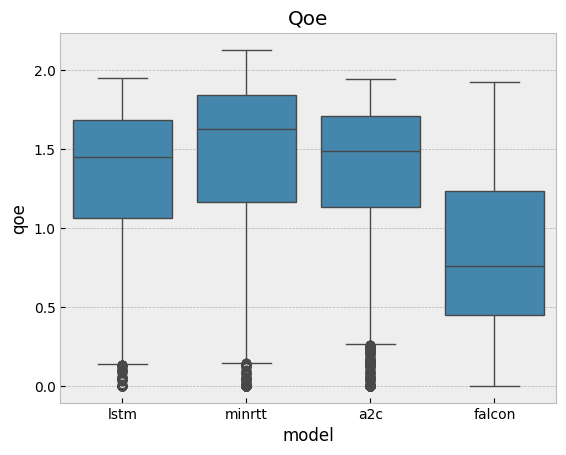

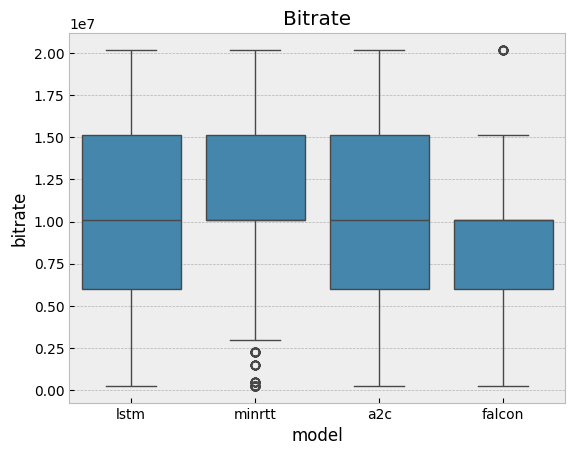

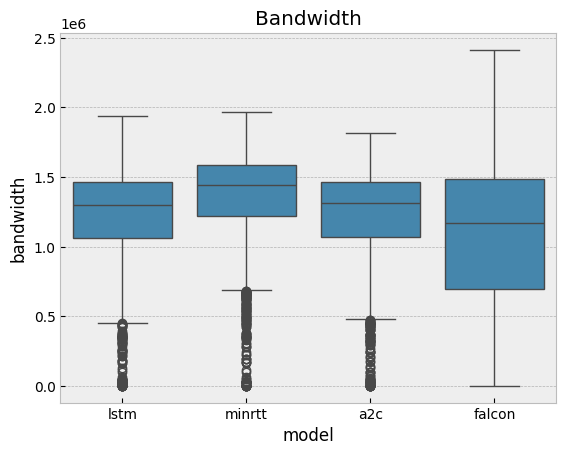

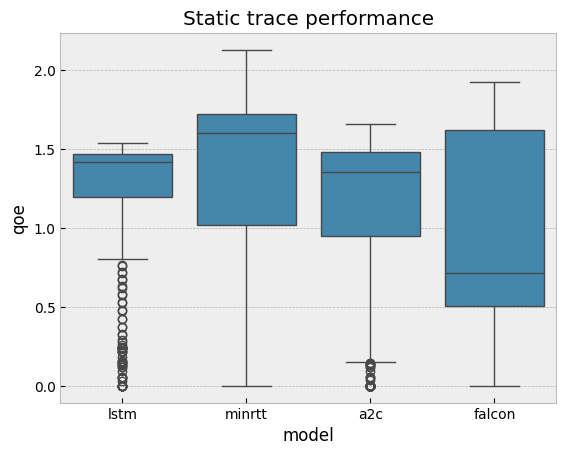

<Axes: xlabel='segment_nr'>

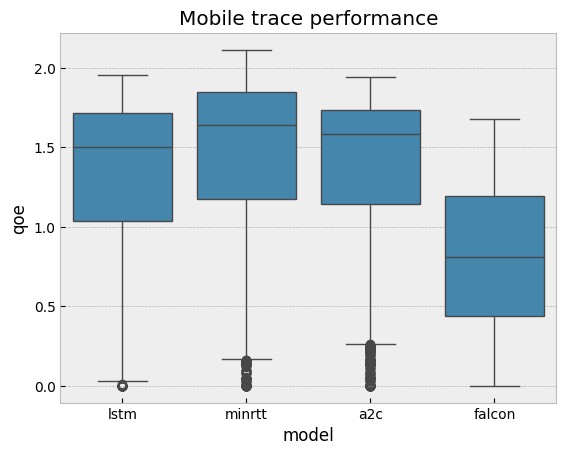

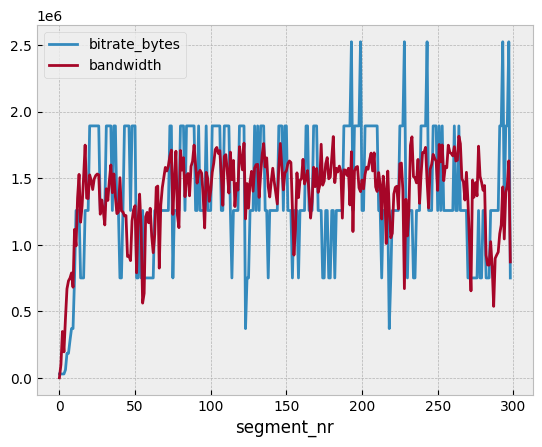

In [5]:
#df_runs = df_runs[df_runs['trace']<4]

#df_runs.groupby(['trace', 'model']).agg({'qoe':'last', 'bitrate':'mean'})
#df_runs.groupby(['model']).agg({'bandwidth':'mean'})
#df_runs.groupby(['model']).agg({'trace_qoe':'mean'})
#df_runs.groupby(['model']).plot(x='model', y='trace_qoe', kind='box')
#plt.boxplot(x=df_runs['model'], y='trace_qoe')
sns.boxplot(data=df_runs, x='model', y='qoe', orient='v')
plt.title('Qoe')
plt.show()
sns.boxplot(data=df_runs, x='model', y='bitrate', orient='v')
plt.title('Bitrate')
plt.show()
sns.boxplot(data=df_runs, x='model', y='bandwidth', orient='v')
plt.title('Bandwidth')
plt.show()
sns.boxplot(data=df_runs[df_runs['mobility']=='static'], x='model', y='qoe')
plt.title('Static trace performance')
plt.show()
sns.boxplot(data=df_runs[df_runs['mobility']=='mobile'], x='model', y='qoe')
plt.title('Mobile trace performance')

df_runs['bitrate_bytes'] = df_runs['bitrate']/8
df_runs[(df_runs['model']=='minrtt') & (df_runs['trace']==2)].plot(x='segment_nr', y=['bitrate_bytes', 'bandwidth']) #, kind='scatter'
#df_runs.groupby(['trace', 'model']).agg({'bwd_path0':'mean'})

In [6]:
df_runs.groupby(['trace', 'model']).agg({'qoe':'last', 'bitrate':'mean'})

qoe       bitrate
trace model                         
0     a2c     1.374429  9.419088e+06
      falcon  0.951673  7.832683e+06
      lstm    1.411736  9.479671e+06
      minrtt  1.567405  1.018425e+07
1     a2c     1.871609  1.075272e+07
      falcon  1.626525  9.792008e+06
      lstm    1.912682  1.083786e+07
      minrtt  2.046571  1.128299e+07
2     a2c     1.749212  1.028211e+07
      falcon  1.680755  9.974020e+06
      lstm    1.730079  1.025842e+07
      minrtt  1.952247  1.096744e+07
3     a2c     1.730828  1.039990e+07
      falcon  1.265272  9.532334e+06
      lstm    1.709164  1.030338e+07
      minrtt  1.939510  1.104988e+07
4     a2c     1.715812  1.011926e+07
      falcon  1.163768  8.438682e+06
      lstm    1.710323  1.018403e+07
      minrtt  1.818789  1.047282e+07
5     a2c     1.370997  8.700071e+06
      falcon  1.917484  1.103469e+07
      lstm    1.464233  8.941896e+06
      minrtt  1.653400  9.982842e+06
6     a2c     1.621783  1.022623e+07
      falcon  0.801580  1.001209e+07
      lstm    1.166311  9.735630e+06
      minrtt  1.752299  1.085302e+07
7     a2c     1.853916  1.028414e+07
      falcon  1.499012  8.914980e+06
      lstm    1.829137  1.030466e+07
      minrtt  1.858116  1.055247e+07
8     a2c     1.733164  1.031617e+07
      falcon  1.329274  8.839791e+06
      lstm    1.731754  1.031955e+07
      minrtt  1.854451  1.078422e+07
9     a2c     0.000000  8.435408e+06
      falcon  0.000000  4.050050e+06
      lstm    1.035667  8.142484e+06
      minrtt  0.000000  1.022362e+07

In [7]:
#df_runs[(df_runs['model']=='lstm') & (df_runs['trace']=='9')][['bwd_path0','bwd_path1']].plot()
#plt.show()
#df_runs[(df_runs['model']=='minrtt') & (df_runs['trace']=='9')][['bwd_path0','bwd_path1']].iloc[100:].plot()

In [8]:



falcon = "central_service/runs/20240515_21_52_35_FALCON_train/"
read(falcon)

['central_service', 'runs', '20240515_21_52_35_falcon_train', '']
['central_service', 'runs', '20240515_21_52_35_falcon_train', '']
['central_service', 'runs', '20240515_21_52_35_falcon_train', '']
['central_service', 'runs', '20240515_21_52_35_falcon_train', '']
['central_service', 'runs', '20240515_21_52_35_falcon_train', '']
['central_service', 'runs', '20240515_21_52_35_falcon_train', '']
['central_service', 'runs', '20240515_21_52_35_falcon_train', '']
['central_service', 'runs', '20240515_21_52_35_falcon_train', '']
['central_service', 'runs', '20240515_21_52_35_falcon_train', '']
['central_service', 'runs', '20240515_21_52_35_falcon_train', '']
